### CSE-221710304057-T.Snithika Patel

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/iris.csv")
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

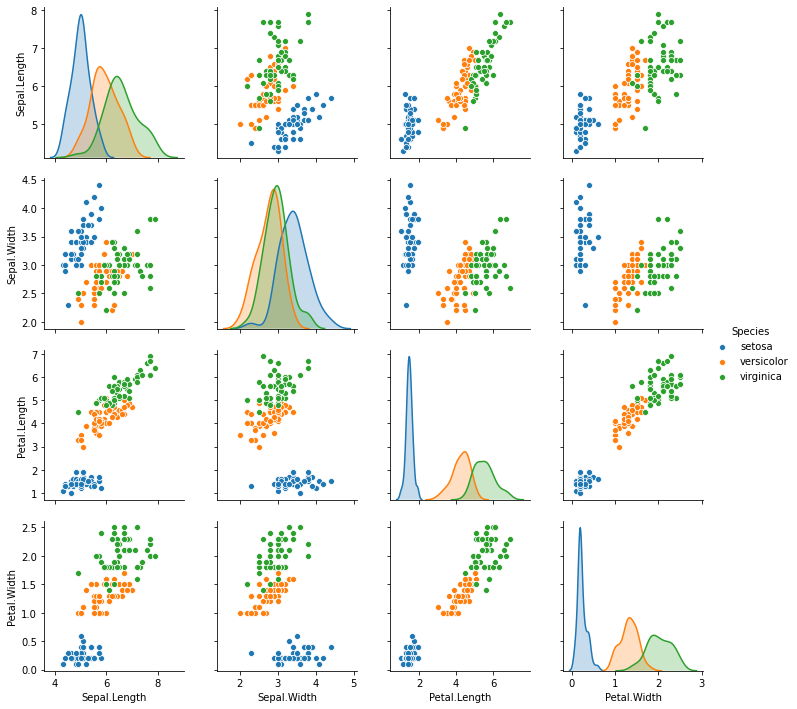

In [5]:
sns.pairplot(data,hue='Species')

In [6]:
X=data.drop('Species',axis=1)
y=data.Species

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [8]:
# Apply the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
# intialization of object
dtree = DecisionTreeClassifier(criterion = 'entropy')
#Applying the classifier to the dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
# Predict on training data
y_train_pred=dtree.predict(X_train)
y_train_pred

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 's

In [10]:
# Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        39
  versicolor       1.00      1.00      1.00        37
   virginica       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [11]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

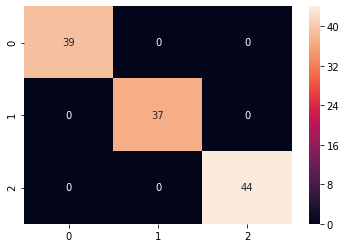

In [12]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

In [13]:
# Prediction on test data(unseen data)
# Syntax: objectname.predict(InputValues)
y_test_pred = dtree.predict(X_test) # corresponding output of X_test is stored in y_test
# Compare the actual y_test values with model predicted y_test_pred
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [14]:
# Kfold CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=3)

array([0.97560976, 0.9       , 0.92307692])

In [15]:
# Hyperparameters
# GridSearchCV--> find optimum parameters
grid_param={'criterion' : ['gini','entropy'],
           'max_depth' : range(2,32,1),
           'min_samples_leaf' : range(1,10,1)}

In [16]:
from sklearn.model_selection import GridSearchCV
#initialization
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree,param_grid = grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                 

In [17]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1}

In [18]:
# We have to build the model with best parameters
#Intialized the DT Classifier
clf = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf=1)

# We need to fit the model to the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
# Prediction on test data
pred_test = clf.predict(X_test)

#Classification Report of actual values 
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### RandomForest classification

In [20]:
# Import , initialize and fit
# Import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier
# initialize the object
rfc = RandomForestClassifier()
#fit the RFC to the dataset
rfc.fit(X_train,y_train)

C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
# Predictions on Training data(unseen data)
#Syntax: objectname.predict(InputValues)
y_pred_train=rfc.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        39
  versicolor       0.97      1.00      0.99        37
   virginica       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [22]:
# Prediction on test data(unseen data)
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [23]:
# CrossValidationScore
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rfc,X_train,y_train,cv=3)
np.mean(scores)

0.9410152178444862